# Handwritten Digit Recognition Model
To view and run on Google Colab, go here: https://colab.research.google.com/drive/1Pk9T4dqGKMJds7DHBhP-BvHXSjFsbzI5?usp=sharing

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical

from keras.models import Sequential
from tensorflow.keras import layers
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import Adam
from keras.models import load_model

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# Step 1: Preprocess Dataset

In [ ]:
from keras.datasets import mnist

#Loading the MNIST dataset
(train_X, train_Y), (test_X, test_Y) = mnist.load_data()

# Flatten the images (to convert them into 1D arrays)
train_X = train_X.reshape((train_X.shape[0], 28, 28, 1))
test_X = test_X.reshape((test_X.shape[0],28, 28, 1))
train_Y = to_categorical(train_Y)
test_Y = to_categorical(test_Y)

# Convert from integers to floats
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')

# Normalize to range 0-1
X_train = train_X / 255.0
X_test = test_X / 255.0

11490434/11490434 [==============================] - 0s 0us/step


# Step 2: Build CNN Model
Reference: https://www.tensorflow.org/tutorials/images/cnn

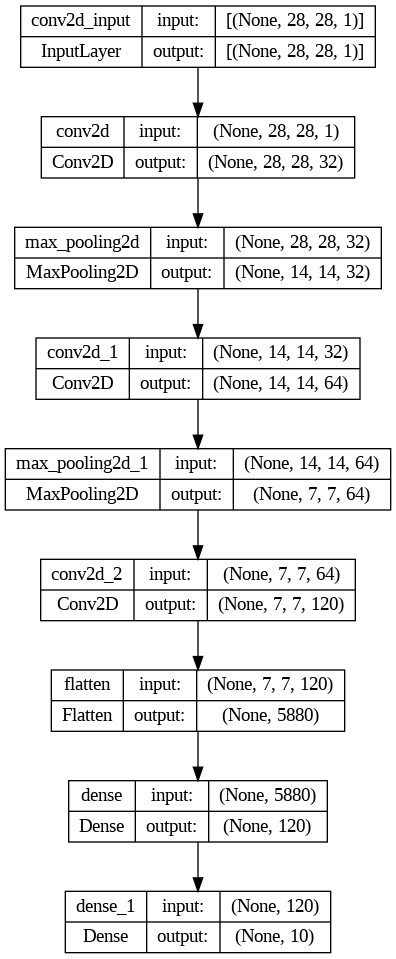

In [ ]:
num_targets = 10 # 0-9 digits
model = models.Sequential()

# First convolutional layer
model.add(layers.Conv2D(32, (3, 3), padding="same", activation='relu', input_shape=(28, 28, 1)))

# Max Pooling layer
model.add(layers.MaxPooling2D((2, 2)))

# Second convolutional layer
model.add(layers.Conv2D(64, (3, 3), padding="same", activation='relu'))

# Max Pooling layer
model.add(layers.MaxPooling2D((2, 2)))

# Third convolutional layer
model.add(layers.Conv2D(120, (3, 3), padding="same", activation='relu'))

# Flatten layers
model.add(layers.Flatten())

# Dense layers
model.add(layers.Dense(120, activation="relu"))
model.add(layers.Dense(num_targets, activation="softmax"))

keras.utils.plot_model(model, show_shapes=True)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 120)         69240     
                                                                 
 flatten (Flatten)           (None, 5880)              0

## a) Train model

In [ ]:
epochs = 100

callbacks = [
    keras.callbacks.ModelCheckpoint("save_at_{epoch}.keras"),
]
model.compile(
    optimizer=keras.optimizers.Adam(3e-4),
    loss=keras.losses.CategoricalCrossentropy(),
    metrics=[keras.metrics.CategoricalAccuracy()],
)
history = model.fit(
    train_X,
    train_Y,
    epochs=epochs,
    callbacks=callbacks,
    validation_data=(test_X, test_Y),
)

Epoch 1/100
1875/1875 [==============================] - 113s 60ms/step - loss: 0.0124 - categorical_accuracy: 0.9973 - val_loss: 0.0532 - val_categorical_accuracy: 0.9908
Epoch 2/100
1875/1875 [==============================] - 110s 59ms/step - loss: 0.0074 - categorical_accuracy: 0.9980 - val_loss: 0.0583 - val_categorical_accuracy: 0.9894
Epoch 3/100
1875/1875 [==============================] - 110s 58ms/step - loss: 0.0097 - categorical_accuracy: 0.9975 - val_loss: 0.0511 - val_categorical_accuracy: 0.9908
Epoch 4/100
1875/1875 [==============================] - 110s 59ms/step - loss: 0.0072 - categorical_accuracy: 0.9980 - val_loss: 0.0656 - val_categorical_accuracy: 0.9909
Epoch 5/100
1875/1875 [==============================] - 108s 58ms/step - loss: 0.0076 - categorical_accuracy: 0.9979 - val_loss: 0.0603 - val_categorical_accuracy: 0.9903
Epoch 6/100
1875/1875 [==============================] - 109s 58ms/step - loss: 0.0077 - categorical_accuracy: 0.9980 - val_loss: 0.0457 - v

## b) Test Model

In [ ]:
results = model.evaluate(test_X, test_Y, verbose=0)
print(results)

preds = model.predict(test_X[:])

# Separate true results from predicted results
y_true = []
y_pred = []

for true_row, pred_row in zip(test_Y[:], preds):
  y_true.append(true_row)
  y_pred.append(pred_row)

[0.2738302946090698, 0.9919999837875366]
313/313 [==============================] - 8s 24ms/step


# Step 3: Analyze Results

Accuracy: 99.20%



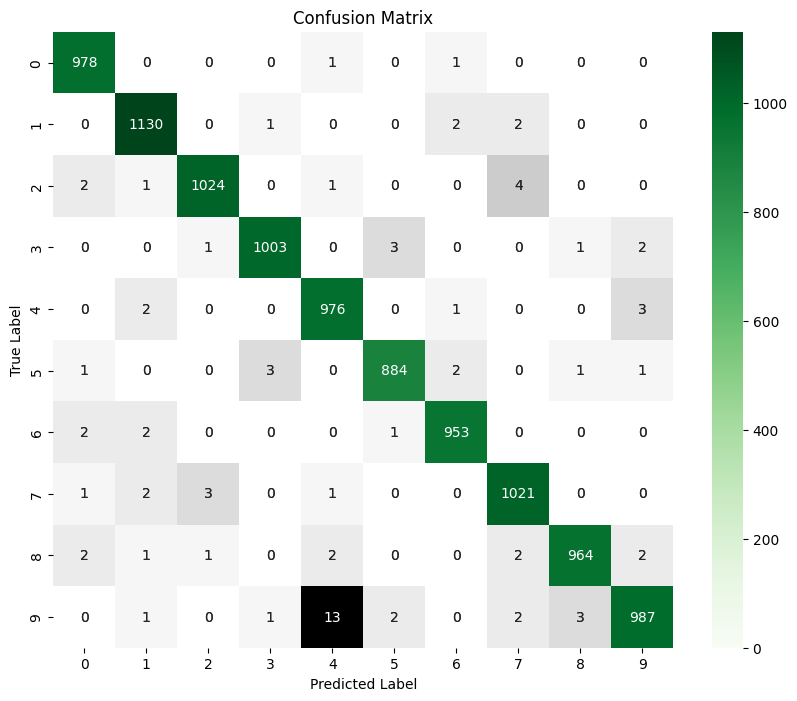

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

y_pred_labels = np.argmax(preds, axis=1)
y_true_labels = np.argmax(test_Y, axis=1)

accuracy = accuracy_score(y_true_labels, y_pred_labels)
print(f'Accuracy: {accuracy*100:.2f}%\n')

conf_matrix = confusion_matrix(y_true_labels, y_pred_labels)

#mask for the diagonal cells
mask = np.zeros_like(conf_matrix, dtype=bool)
np.fill_diagonal(mask, True)

plt.figure(figsize=(10, 8))

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Greens', cbar=True,
            xticklabels=[str(i) for i in range(10)],
            yticklabels=[str(i) for i in range(10)])

#for distinguishing common misidentifications (wrong predictions)
sns.heatmap(conf_matrix, mask=mask, annot=True, fmt='d', cmap='Greys', cbar=False,
            xticklabels=[str(i) for i in range(10)],
            yticklabels=[str(i) for i in range(10)])

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()